# MNIST AutoEncoder

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [5]:
(X_train, y_train), (X_test, y_test) =tf.keras.datasets.mnist.load_data()

X_train = X_train.astype(np.float32)/255.
X_test = X_test.astype(np.float32)/255.

X_train_flatten = X_train.reshape((X_train.shape[0], -1))
X_test_flatten = X_test.reshape((X_test.shape[0], -1))

print(X_train_flatten.shape)
print(X_test_flatten.shape)

(60000, 784)
(10000, 784)


In [13]:
input = Input(shape=(784, ))
encoded_1 = Dense(512, activation="relu")(input)
encoded_2 = Dense(128, activation="relu")(encoded_1)
encoded_3 = Dense(32, activation="relu")(encoded_2)
decoded_1 = Dense(128, activation="relu")(encoded_3)
decoded_2 = Dense(512, activation="relu")(decoded_1)
output = Dense(784, activation="sigmoid")(decoded_2)

model = Model(input, output)
intermediate_1 = Model(input, encoded_1)
intermediate_2 = Model(input, encoded_2)
model.compile(optimizer="adam", loss="MSE")

In [14]:
# novelty class를 1로 지정
X_train_except_1 = X_train_flatten[y_train != 1]
X_test_except_1 = X_test_flatten[y_test != 1]

model.fit(X_train_except_1, X_train_except_1, batch_size=256, epochs=20, validation_data=(X_test_except_1, X_test_except_1))

Epoch 1/20
209/209 [==============================] - 3s 13ms/step - loss: 0.0567 - val_loss: 0.0313
Epoch 2/20
209/209 [==============================] - 3s 13ms/step - loss: 0.0245 - val_loss: 0.0199
Epoch 3/20
209/209 [==============================] - 5s 26ms/step - loss: 0.0179 - val_loss: 0.0167
Epoch 4/20
209/209 [==============================] - 6s 27ms/step - loss: 0.0152 - val_loss: 0.0159
Epoch 5/20
209/209 [==============================] - 6s 28ms/step - loss: 0.0136 - val_loss: 0.0137
Epoch 6/20
209/209 [==============================] - 6s 28ms/step - loss: 0.0126 - val_loss: 0.0128
Epoch 7/20
209/209 [==============================] - 6s 28ms/step - loss: 0.0118 - val_loss: 0.0126
Epoch 8/20
209/209 [==============================] - 6s 27ms/step - loss: 0.0110 - val_loss: 0.0119
Epoch 9/20
209/209 [==============================] - 6s 27ms/step - loss: 0.0105 - val_loss: 0.0113
Epoch 10/20
209/209 [==============================] - 6s 29ms/step - loss: 0.0100 - val_lo

In [15]:
decoded_img = model.predict(X_test_flatten)

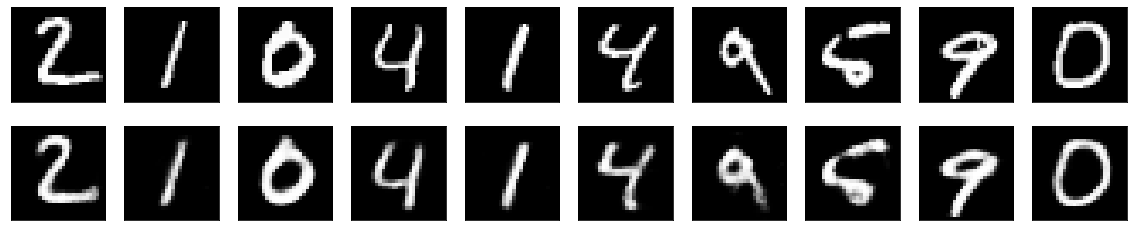

In [16]:
import matplotlib.pyplot as plt
n = 10 # 이미지 갯수
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # 원본 데이터
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test_flatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # 재구성된 데이터
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


* 1을 제외하고 학습하였음에도 시각적으로 문제없이 잘 복구가 됨. 간단한 모양이기 때문에 다른 클래스로 학습된 특징으로도 표현이 가능한 것 같음

                  0
count  10000.000000
mean       2.458083
std        0.641609
min        1.029302
25%        1.990934
50%        2.381879
75%        2.844031
max        5.860595


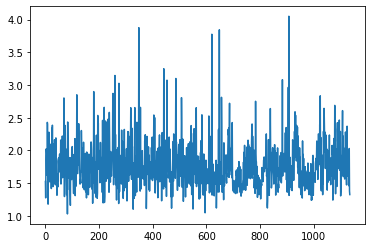

class 0 : 2.5685372981489922
class 1 : 1.7693971888084243
class 2 : 2.8879059323275738
class 3 : 2.5665127247867017
class 4 : 2.488540074611633
class 5 : 2.6894786864385476
class 6 : 2.5023717218251718
class 7 : 2.120704883035519
class 8 : 2.898592436950065
class 9 : 2.219579913334993


In [29]:
from numpy.linalg import norm
import pandas as pd

l2_norm = norm(decoded_img-X_test_flatten, axis=1, ord=2)

l2_norm_df = pd.DataFrame(l2_norm)
print(l2_norm_df.describe())

#l2_norm.sort()
#plt.plot(l2_norm)
#plt.show()

l2_norm_1 = l2_norm[y_test==1]
#l2_norm_1.sort()
plt.plot(l2_norm_1)
plt.show()

# class 별 mean reconstruction error
for i in range(10):
    print(f"class {i} :", sum(l2_norm[y_test==i])/len(l2_norm[y_test==i]))

* novelty class로 설정했던 1의 l2-norm이 일반 클래스에 비해 유의미한 reconstruction error 분포를 보이지 않음
* 오히려 다른 class의 reconstruction error 평균값보다 낮은 에러율을 보임